# THE BELLABEAT CASE STUDY

In this case study, I find myself on the marketing analytics team at Bellabeat, a company specializing in health-focused products for women. Our mission is to unlock growth opportunities for the company by analyzing smart device fitness data. Under the guidance of Bellabeat's co-founder and Chief Creative Officer, Urška Sršen, I'm tasked with delving into smart device usage trends.

The goal is to gain insights into how consumers utilize non-Bellabeat smart devices, with the aim of applying these findings to enhance our marketing strategy. I'm excited to contribute to Bellabeat's mission of empowering women through data-driven health and wellness solutions.

To begin, I'll explore the FitBit Fitness Tracker Data, a publicly available dataset containing minute-level data on physical activity, heart rate, and sleep monitoring from Fitbit users. However, I'll also consider supplementing this data to address potential limitations. My journey will involve data preparation, ensuring the dataset's integrity, and addressing any data-related challenges.

Ultimately, I aim to produce a comprehensive report with compelling visualizations and actionable recommendations. By leveraging these insights, we can shape Bellabeat's marketing strategy to resonate with our target audience and drive growth in the competitive smart device market.

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sklearn.__version__

'1.3.0'

I am goint to import all the require datasets

In [127]:
activity= pd.read_csv("C:\\Users\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\dailyActivity_merged.csv")
calories= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\dailyCalories_merged.csv")
intense= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\dailyIntensities_merged.csv")
step= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\dailySteps_merged.csv")
heartrate= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\heartrate_seconds_merged.csv")
sleep= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\sleepDay_merged.csv")
weight= pd.read_csv("C:\\Users\\TOJMARK LTD\\DATA SCIENCE PROJECT\\BellaBeat Project\\weightLogInfo_merged.csv")

# Data Exploratory

In [128]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [129]:
calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [130]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [131]:
intense.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


Let confirm the shape of each dataset

In [132]:
print("Activity shape:", activity.shape)
print("Sleep shape:",sleep.shape)
print("Intensity shape:",intense.shape)
print("Calories shape:",calories.shape)

Activity shape: (940, 15)
Sleep shape: (413, 5)
Intensity shape: (940, 10)
Calories shape: (940, 3)


# Checking for Misssing values

In [133]:
# Check for missing values in each column
activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [134]:
sleep.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [135]:
intense.isna().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

It shows each dataset has no missing values, now let me futher exploring the dataset to familirise myself with it

In [136]:
print(activity.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

There are some interesting statistics related to physical activity and fitness tracking. The dataset comprises information from 940 individuals, and it offers valuable insights into their daily activity patterns.

On average, users take approximately 7,638 steps a day, covering a distance of around 5.49 kilometers. Interestingly, some users logged no activity, while others recorded a maximum of 36,019 steps. The data also reveals variations in activity intensity, with users engaging in very active, moderately active, and light active distances. Sedentary activity is almost negligible for most users.

In terms of minutes spent in different activity categories, users generally spend around 21 minutes in very active pursuits, 13 minutes in fairly active ones, and a significant portion of their day, approximately 991 minutes, in sedentary activities. Caloric burn averages at 2,303 calories.

These statistics paint a picture of diverse physical activity levels among users. It's clear that some individuals are highly active, while others are more sedentary. 

In [137]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [138]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [139]:
# Calculate the average for some specific columns on activity dataset and round them to 0 decimal places
average_total_steps = activity['TotalSteps'].mean()
average_total_distance = activity['TotalDistance'].mean()
average_sedentary_minutes = activity['SedentaryMinutes'].mean()
average_calories = activity['Calories'].mean()

# Round the average values to 0 decimal places
average_total_steps = round(average_total_steps, 0)
average_total_distance = round(average_total_distance, 0)
average_sedentary_minutes = round(average_sedentary_minutes, 0)
average_calories = round(average_calories, 0)

print(f"Average Total Steps: {average_total_steps}")
print(f"Average Total Distance: {average_total_distance}")
print(f"Average Sedentary Minutes: {average_sedentary_minutes}")
print(f"Average Calories: {average_calories}")

Average Total Steps: 7638.0
Average Total Distance: 5.0
Average Sedentary Minutes: 991.0
Average Calories: 2304.0


In the dataset, the average daily steps recorded by users stand at 7,638, indicating moderate activity levels. Sedentary minutes are notably high, averaging around 991 minutes, highlighting a need for promoting more active lifestyles. Users also burn an average of 2,304 calories daily, reflecting diverse activity levels and dietary needs.

In [140]:
# Calculate the average for the specific columns for sleep dataset
average_total_sleep_records = sleep['TotalSleepRecords'].mean()
average_total_minutes_asleep = sleep['TotalMinutesAsleep'].mean()
average_total_time_in_bed = sleep['TotalTimeInBed'].mean()

# Round the average values to 0 decimal places
average_total_sleep_records = round(average_total_sleep_records, 0)
average_total_minutes_asleep = round(average_total_minutes_asleep, 0)
average_total_time_in_bed = round(average_total_time_in_bed, 0)

print(f"Average Total Sleep Records: {average_total_sleep_records}")
print(f"Average Total Minutes Asleep: {average_total_minutes_asleep}")
print(f"Average Total Time In Bed: {average_total_time_in_bed}")

Average Total Sleep Records: 1.0
Average Total Minutes Asleep: 419.0
Average Total Time In Bed: 459.0


# Number of Participant In Each Dataset From FitBit Fitness Tracker

In [141]:
# Count the number of distinct users in the 'activity' dataset
distinct_users_activity = activity['Id'].nunique()
distinct_users_sleep = sleep['Id'].nunique()
distinct_users_intense = intense['Id'].nunique()
distinct_users_calories = calories['Id'].nunique()

print(f"Number of Distinct Users in 'activity' dataset: {distinct_users_activity}")
print(f"Number of Distinct Users in 'sleep' dataset: {distinct_users_sleep}")
print(f"Number of Distinct Users in 'sleep' dataset: {distinct_users_intense}")
print(f"Number of Distinct Users in 'sleep' dataset: {distinct_users_calories}")

Number of Distinct Users in 'activity' dataset: 33
Number of Distinct Users in 'sleep' dataset: 24
Number of Distinct Users in 'sleep' dataset: 33
Number of Distinct Users in 'sleep' dataset: 33


There are 33 participants apart from sleep data that has 24 

# Merging Activity and Sleep Dataset 
I need to merge activity dataset and sleep data before we can continue for our exploration. To get this done require us to convert the date to the same datetime format so as to be able to merge both data by date

In [142]:
# Converting date columns to a consistent format
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

# Seting date columns as the index
activity.set_index('ActivityDate', inplace=True)
sleep.set_index('SleepDay', inplace=True)

# Merging the datasets on the date index
merged_data = pd.merge(activity, sleep, how='inner', left_index=True, right_index=True)

In [143]:
merged_data.head()

,Id_x,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
ActivityDate,,,,,,,,,,,,,,,,,,
2016-04-12,1503960366,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1503960366,1,327,346
2016-04-12,1503960366,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1927972279,3,750,775
2016-04-12,1503960366,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2026352035,1,503,546
2016-04-12,1503960366,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,3977333714,1,274,469
2016-04-12,1503960366,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4020332650,1,501,541


# Explorative analysis

C:\ProgramData\anaconda3\envs\ojtaiwo\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


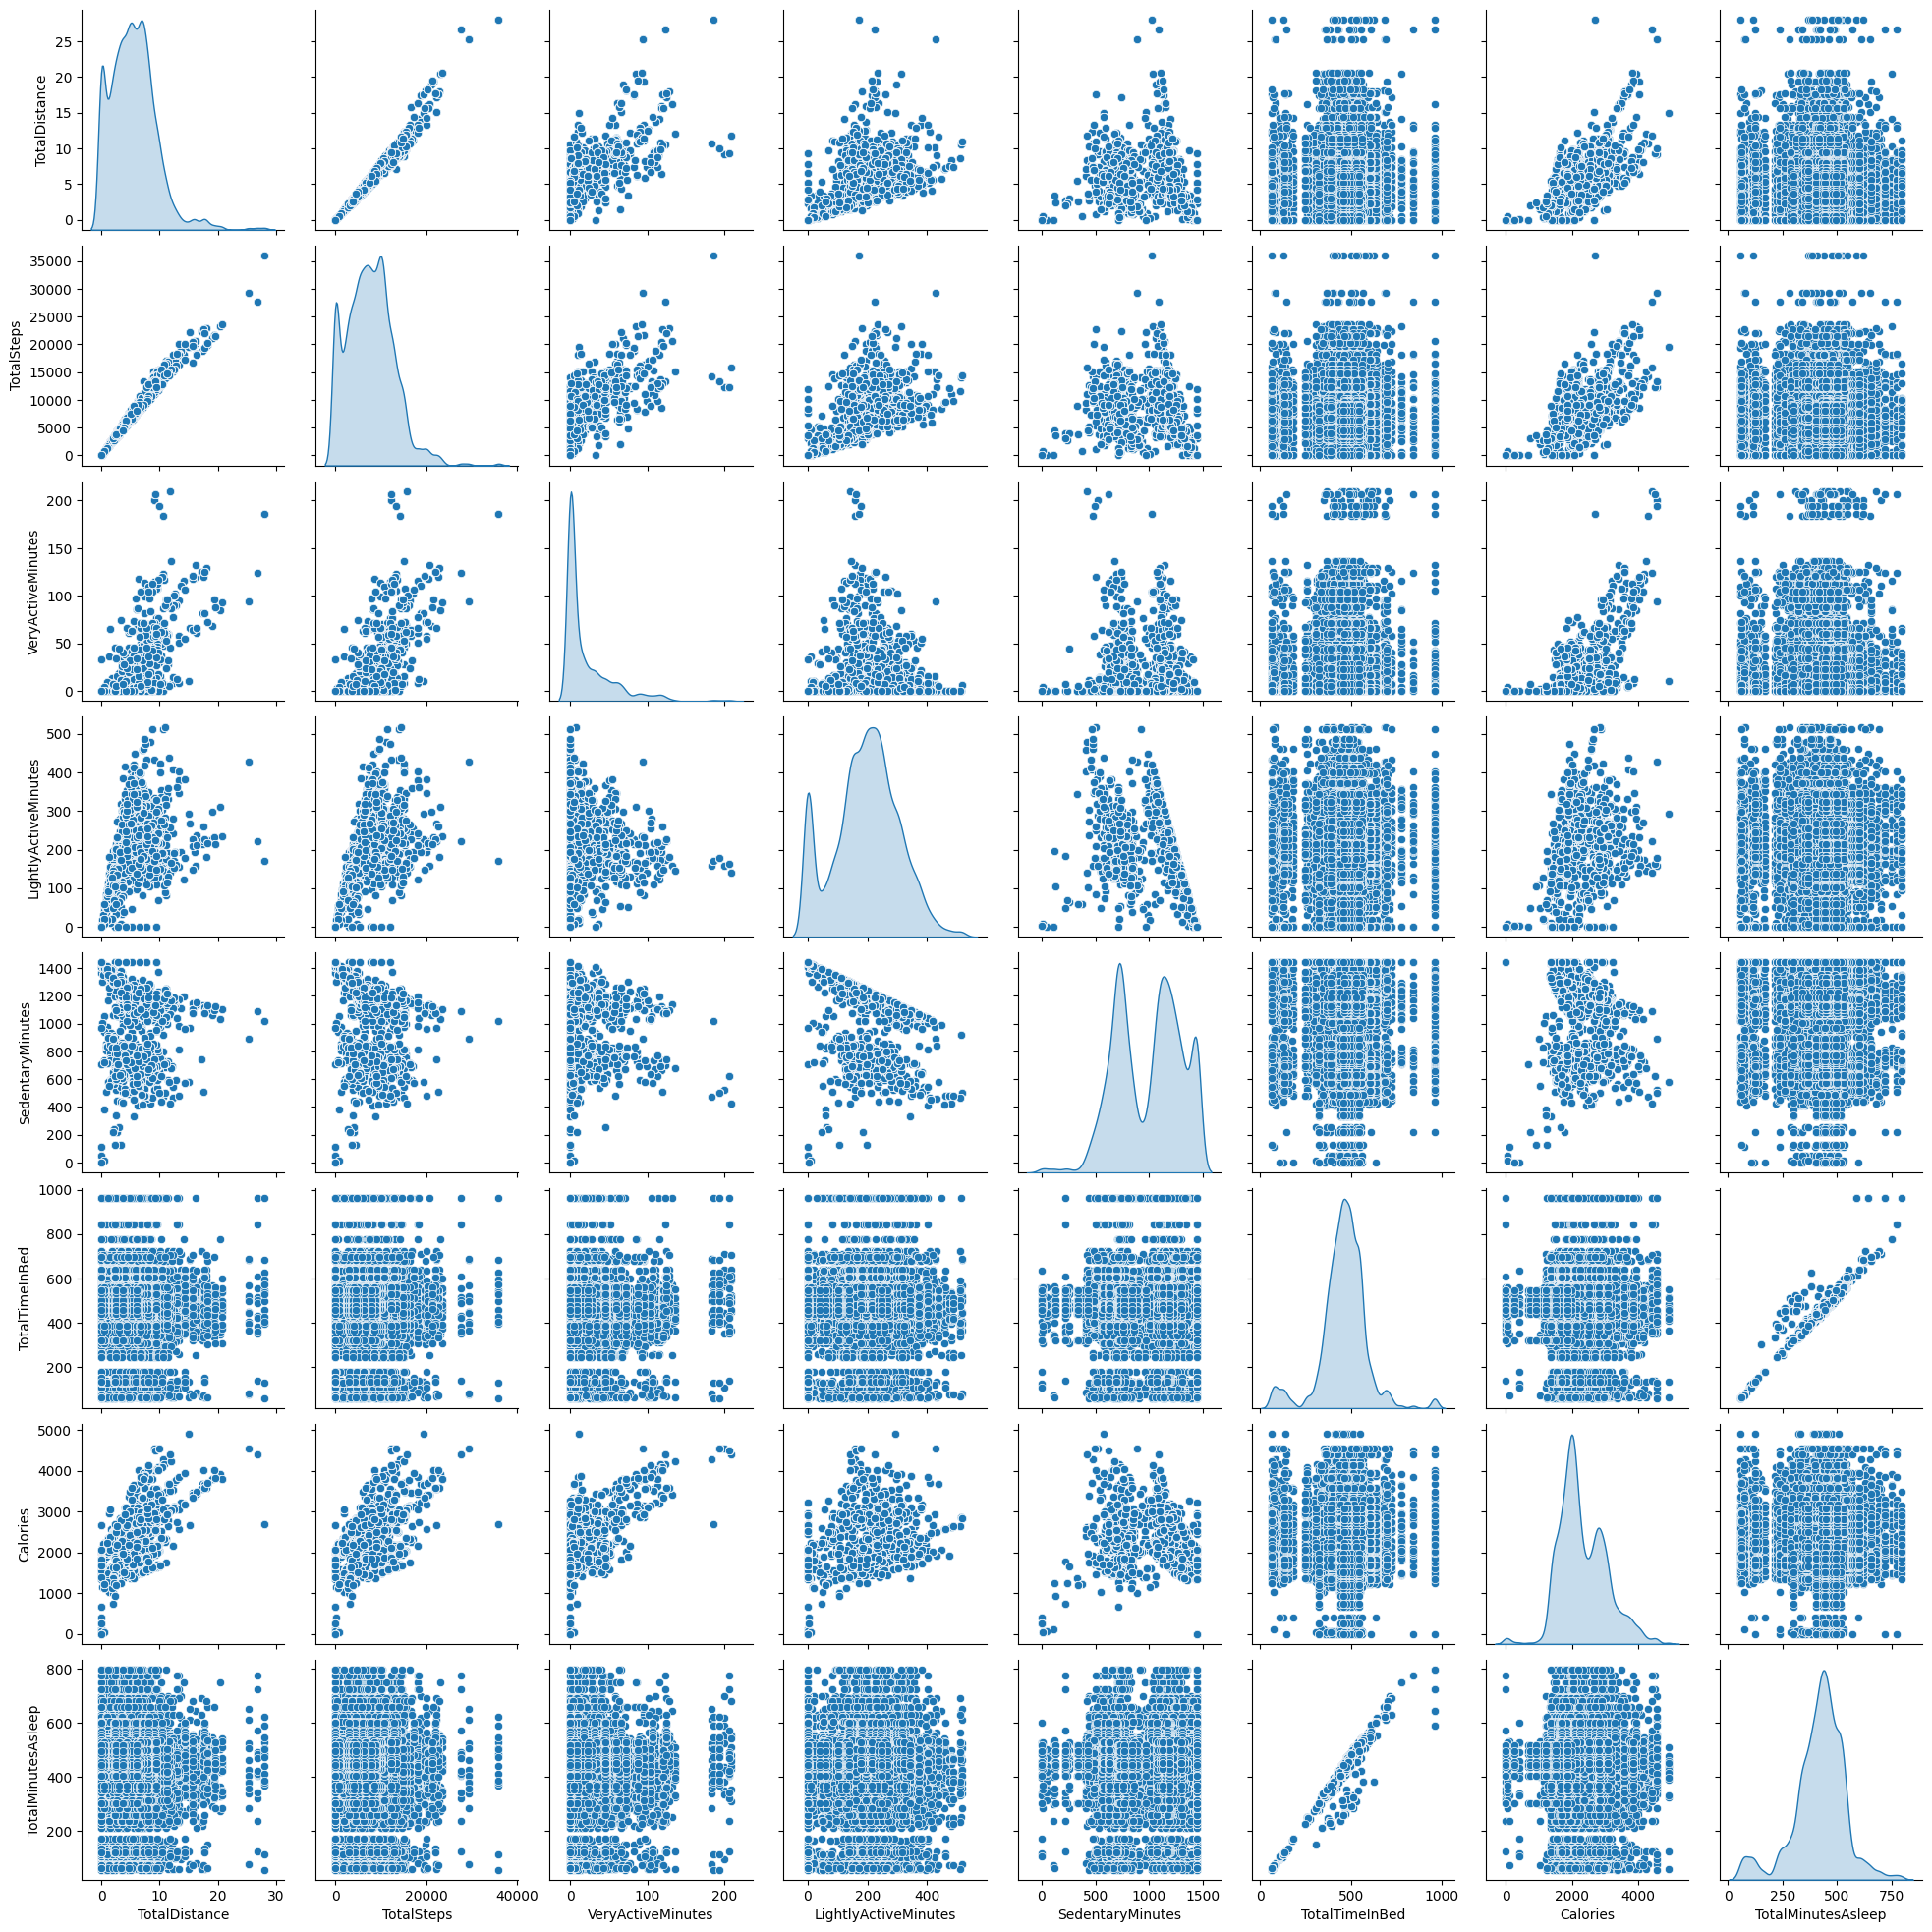

In [144]:
#Let first utlise pairplot to check for relationship of some specific columns
# Selecting the relevant numeric columns from merged_data
selected_columns = ['TotalDistance', 'TotalSteps', 'VeryActiveMinutes', 'LightlyActiveMinutes',
                    'SedentaryMinutes', 'TotalTimeInBed', 'Calories', 'TotalMinutesAsleep']
numeric_data = merged_data[selected_columns]

# Create a pairplot
sns.pairplot(numeric_data, diag_kind='kde')

# Show the plot
plt.show()

In [145]:
# using corr function to check correlation of total steps and calories burn
correlation = merged_data['TotalSteps'].corr(merged_data['Calories'])

print(f"Correlation between Total Steps and Calories: {correlation:.2f}")

Correlation between Total Steps and Calories: 0.59


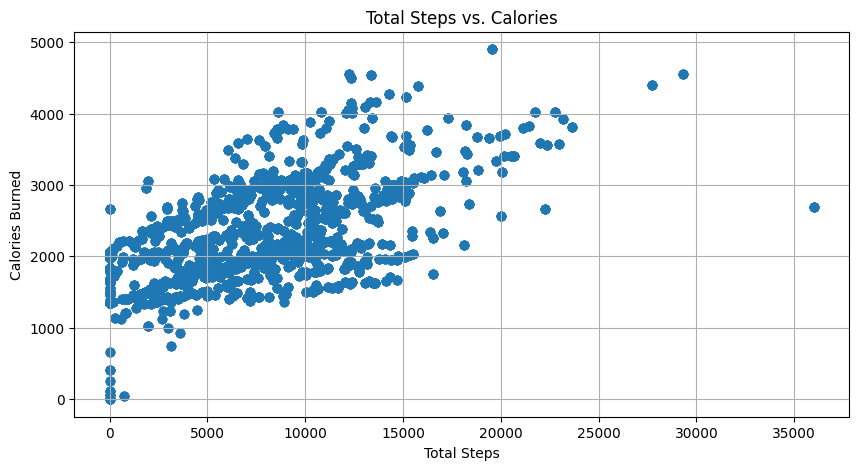

In [147]:
#Let visualising it
x = merged_data['TotalSteps']
y = merged_data['Calories']

# Creating a scatter plot to check the relationship
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5)
plt.title('Total Steps vs. Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()

It shows there is a correlation between the totoal steps and the calories

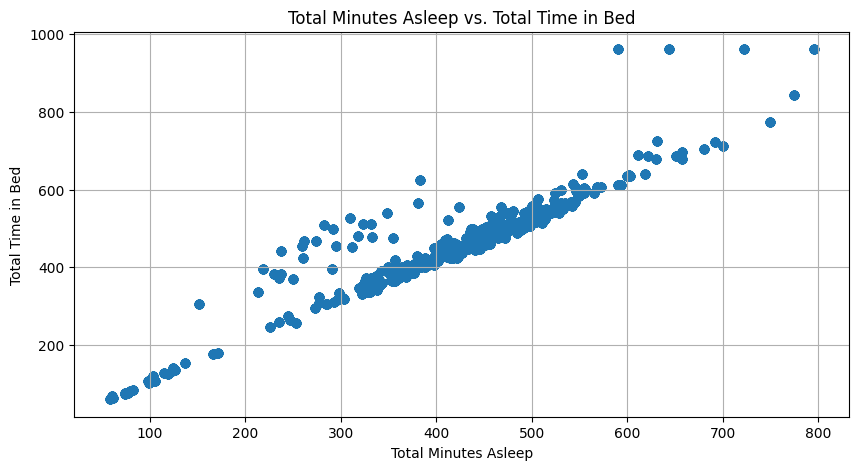

In [105]:
# Assuming you have a merged dataset named 'merged_data'
x = merged_data['TotalMinutesAsleep']
y = merged_data['TotalTimeInBed']

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5)
plt.title('Total Minutes Asleep vs. Total Time in Bed')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed')
plt.grid(True)

# Show the scatter plot
plt.show()

This is a strong correlation between the minute in bed and the total minute asleep. It indiscate that the perticipant falls asleep peacefully without no concern

Correlation between Sedentary Minutes and Total Minutes Asleep: -0.01


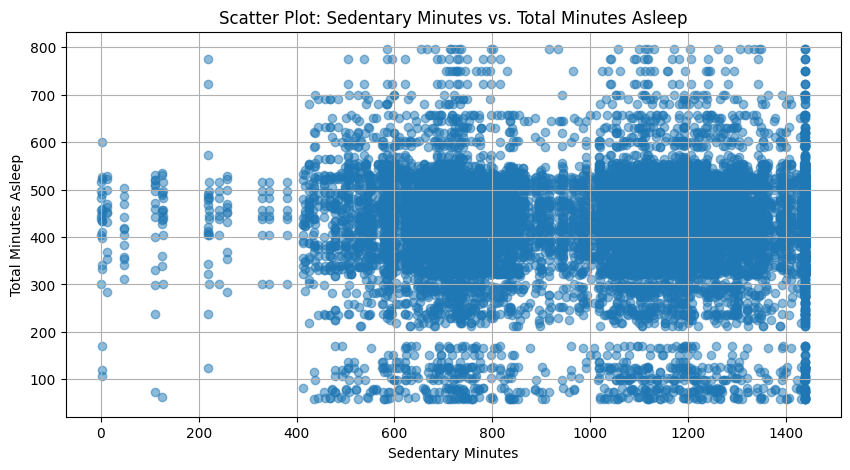

In [148]:
# Assuming you have a merged dataset named 'merged_data'
x = merged_data['SedentaryMinutes']
y = merged_data['TotalMinutesAsleep']

# using corr function to check correlation of total steps and calories burn
correlation = merged_data['SedentaryMinutes'].corr(merged_data['TotalMinutesAsleep'])

print(f"Correlation between Sedentary Minutes and Total Minutes Asleep: {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot: Sedentary Minutes vs. Total Minutes Asleep')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total Minutes Asleep')
plt.grid(True)

# Show the scatter plot
plt.show()

A correlation coefficient of -0.01 suggests a weak negative correlation between sedentary minutes and total minutes asleep. This implies that there is a minor tendency for users who engage in less exercise to experience slightly less sleepiness. However, it's important to note that the correlation is very weak and may not have significant practical implications.

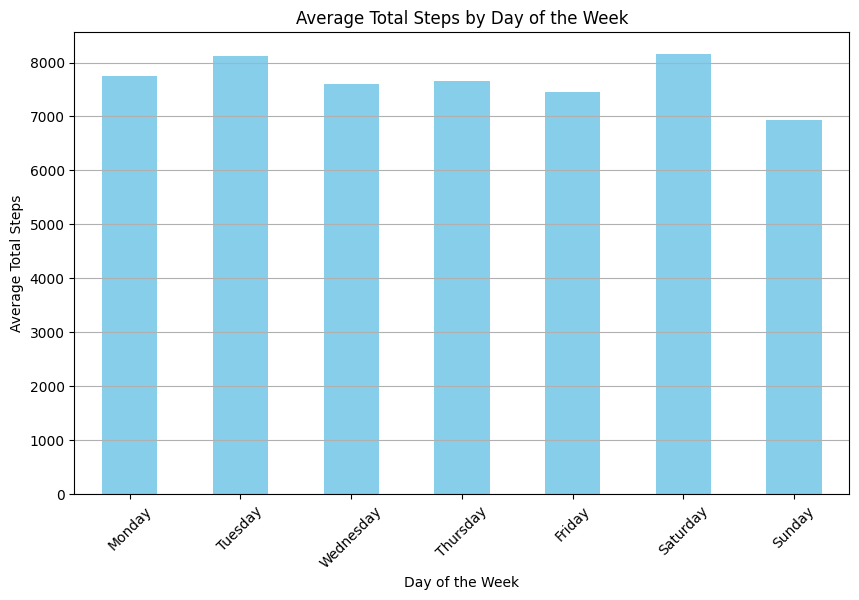

In [149]:
# Extract the day of the week from the index
merged_data['DayOfWeek'] = merged_data.index.day_name()

# Group the data by 'DayOfWeek' and calculate the mean of 'TotalSteps' for each day
grouped_data = merged_data.groupby('DayOfWeek')['TotalSteps'].mean()

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the grouped data by the predefined order
grouped_data = grouped_data.reindex(days_order)

# Create a bar plot to visualize the mean steps for each day of the week
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average Total Steps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Steps')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the bar plot
plt.show()

The most active day is Saturday follows by monday

# The Relationship Between Activity and Weight Dataset for BMI, WEIGHT, FAT
To explore the relationship between activity and weight in the dataset, specifically looking at BMI (Body Mass Index), weight, and fat, I will perform correlation analysis and visualize these relationships using scatter plots and corr functions. 

In [150]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [151]:
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [152]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2016-04-12 to 2016-05-12
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   TotalSteps                940 non-null    int64  
 2   TotalDistance             940 non-null    float64
 3   TrackerDistance           940 non-null    float64
 4   LoggedActivitiesDistance  940 non-null    float64
 5   VeryActiveDistance        940 non-null    float64
 6   ModeratelyActiveDistance  940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   SedentaryActiveDistance   940 non-null    float64
 9   VeryActiveMinutes         940 non-null    int64  
 10  FairlyActiveMinutes       940 non-null    int64  
 11  LightlyActiveMinutes      940 non-null    int64  
 12  SedentaryMinutes          940 non-null    int64  
 13  Calories                  940 non-null    int6

In [153]:
# Merging the 'activity' and 'weight' datasets on the 'Id' column
merged_weight = pd.merge(activity, weight, on='Id', how='inner')

# Calculate the correlations
correlation_bmi = merged_weight['TotalSteps'].corr(merged_weight['BMI'])
correlation_weight = merged_weight['TotalSteps'].corr(merged_weight['WeightKg'])
correlation_fat = merged_weight['TotalSteps'].corr(merged_weight['Fat'])
print(correlation_bmi)
print(correlation_weight)
print(correlation_fat)

-0.15979152758712398
0.2647917334644661
-0.6022273397176938


The negative sign shows that there is negative relation between the total step to weight, bmi and fat contained. To finalise it, let check through visualisation

Text(0, 0.5, 'Total Steps')

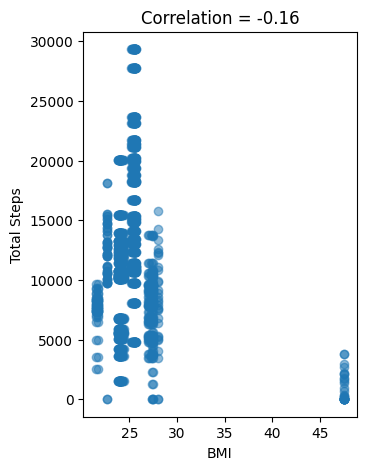

In [154]:
# Create scatter plots to visualize the relationships
plt.figure(figsize=(12, 5))

# Scatter plot for BMI vs. Total Steps
plt.subplot(131)
plt.scatter(merged_weight['BMI'], merged_weight['TotalSteps'], alpha=0.5)
plt.title(f'Correlation = {correlation_bmi:.2f}')
plt.xlabel('BMI')
plt.ylabel('Total Steps')

Text(0, 0.5, 'Total Steps')

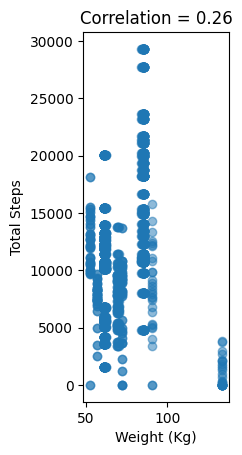

In [155]:
# Scatter plot for Weight vs. Total Steps
plt.subplot(132)
plt.scatter(merged_weight['WeightKg'], merged_weight['TotalSteps'], alpha=0.5)
plt.title(f'Correlation = {correlation_weight:.2f}')
plt.xlabel('Weight (Kg)')
plt.ylabel('Total Steps')

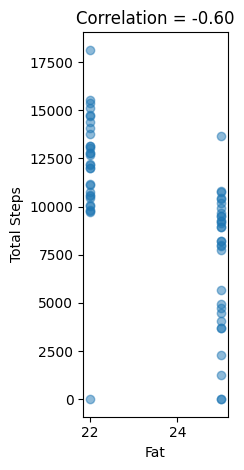

In [156]:
# Scatter plot for Fat vs. Total Steps
plt.subplot(133)
plt.scatter(merged_weight['Fat'], merged_weight['TotalSteps'], alpha=0.5)
plt.title(f'Correlation = {correlation_fat:.2f}')
plt.xlabel('Fat')
plt.ylabel('Total Steps')

plt.tight_layout()

# Show the scatter plots
plt.show()

# Let check for sendatory minutes with Fat, BMI and WEIGHT

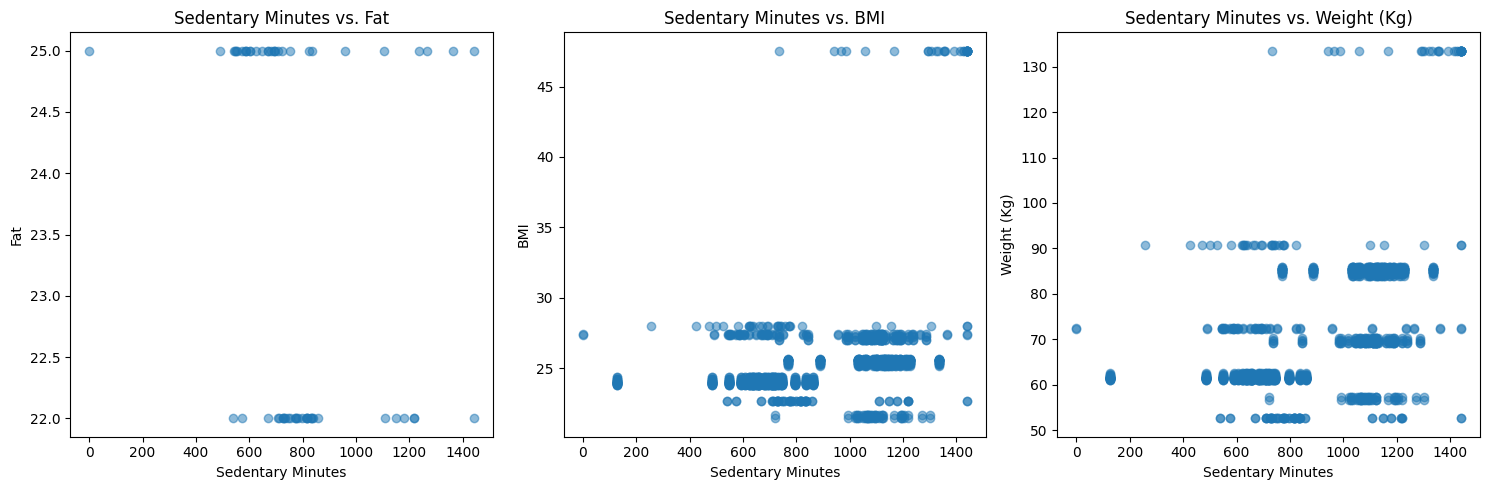

In [157]:
# Creating a scatter plot for Sedentary Minutes vs. Fat
plt.figure(figsize=(15, 5))

# Scatter plot for Sedentary Minutes vs. Fat
plt.subplot(131)
plt.scatter(merged_weight['SedentaryMinutes'], merged_weight['Fat'], alpha=0.5)
plt.title('Sedentary Minutes vs. Fat')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Fat')

# Scatter plot for Sedentary Minutes vs. BMI
plt.subplot(132)
plt.scatter(merged_weight['SedentaryMinutes'], merged_weight['BMI'], alpha=0.5)
plt.title('Sedentary Minutes vs. BMI')
plt.xlabel('Sedentary Minutes')
plt.ylabel('BMI')

# Scatter plot for Sedentary Minutes vs. Weight
plt.subplot(133)
plt.scatter(merged_weight['SedentaryMinutes'], merged_weight['WeightKg'], alpha=0.5)
plt.title('Sedentary Minutes vs. Weight (Kg)')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Weight (Kg)')

plt.tight_layout()

# Show the scatter plots
plt.show()

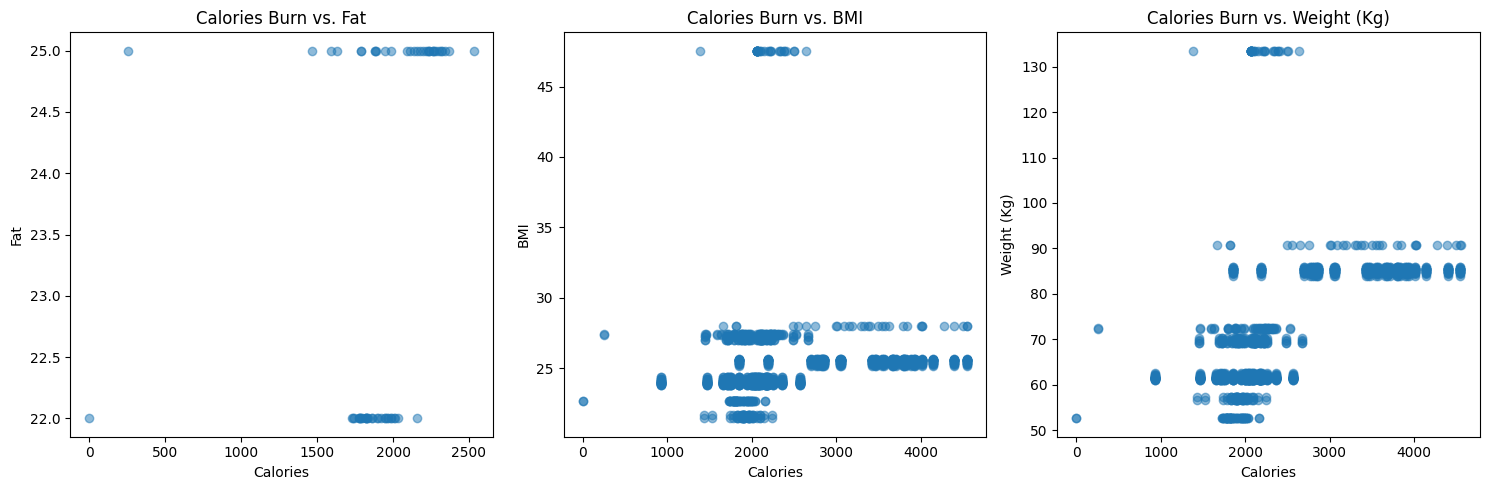

In [158]:
# Creating a scatter plot for Total Time in Bed vs. Fat
plt.figure(figsize=(15, 5))

# Scatter plot for Total Time in Bed vs. Fat
plt.subplot(131)
plt.scatter(merged_weight['Calories'], merged_weight['Fat'], alpha=0.5)
plt.title('Calories Burn vs. Fat')
plt.xlabel('Calories')
plt.ylabel('Fat')

# Scatter plot for Total Time in Bed vs. BMI
plt.subplot(132)
plt.scatter(merged_weight['Calories'], merged_weight['BMI'], alpha=0.5)
plt.title('Calories Burn vs. BMI')
plt.xlabel('Calories')
plt.ylabel('BMI')

# Scatter plot for Total Time in Bed vs. Weight
plt.subplot(133)
plt.scatter(merged_weight['Calories'], merged_weight['WeightKg'], alpha=0.5)
plt.title('Calories Burn vs. Weight (Kg)')
plt.xlabel('Calories')
plt.ylabel('Weight (Kg)')

plt.tight_layout()

# Show the scatter plots
plt.show()

In [159]:
# let calculate the correlation
correlation_fat = merged_weight['Calories'].corr(merged_weight['Fat'])
correlation_bmi = merged_weight['Calories'].corr(merged_weight['BMI'])
correlation_weight = merged_weight['Calories'].corr(merged_weight['WeightKg'])

print(f"Correlation between Calories burn and Fat: {correlation_fat:.2f}")
print(f"Correlation between  burnCalories burn and BMI: {correlation_bmi:.2f}")
print(f"Correlation between Calories burn and Weight (Kg): {correlation_weight:.2f}")

Correlation between Calories burn and Fat: 0.28
Correlation between  burnCalories burn and BMI: 0.12
Correlation between Calories burn and Weight (Kg): 0.65


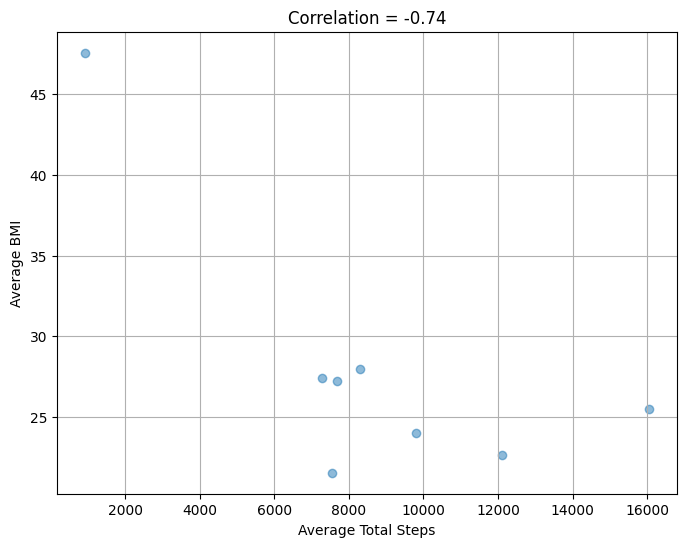

In [160]:
# Group the data by 'DayOfWeek' and calculate the mean of 'TotalSteps' and 'BMI'
grouped_data = merged_weight.groupby('Id')[['TotalSteps', 'BMI']].mean()

# Calculate the correlation between average total steps and average BMI
correlation = grouped_data['TotalSteps'].corr(grouped_data['BMI'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(grouped_data['TotalSteps'], grouped_data['BMI'], alpha=0.5)
plt.title(f'Correlation = {correlation:.2f}')
plt.xlabel('Average Total Steps')
plt.ylabel('Average BMI')
plt.grid(True)

# Show the scatter plot
plt.show()

The correlation coefficient of -0.74 indicates a strong negative relationship between active participants and variables such as weight, fat content, and BMI (Body Mass Index). This suggests that as activity levels increase, there is a tendency for weight, fat content, and BMI to decrease.

# Findings

The average total steps taken by the participants in the 'activity' dataset is 7638, with an average total distance of 5.0 miles.

Participants spend an average of 991 minutes in sedentary activities and burn an average of 2304 calories.
    
The 'activity' dataset contains data from 33 distinct users, while the 'sleep' dataset contains data from 24 distinct users.
    
There is a strong positive correlation of 0.59 between total steps and calories burned, indicating that as the number of steps increases, the calories burned also increase.
    
A notable finding is a strong positive correlation between the time spent in bed and the total minutes asleep, suggesting that participants have restful sleep with no interruptions.
    
Surprisingly, there is a negligible correlation of -0.01 between sedentary minutes and total minutes asleep, indicating that sedentary behavior doesn't significantly affect sleep duration.
    
Saturday is the most active day of the week, followed by Monday.
    
There is a weak negative correlation of -0.16 between total steps and BMI, a moderate positive correlation of 0.26 between total steps and weight, and a strong negative correlation of -0.60 between total steps and body fat percentage.
    
Calories burned have a moderate positive correlation of 0.28 with body fat percentage and a weak positive correlation of 0.12 with BMI. However, there is a strong positive correlation of 0.65 between calories burned and weight (in kilograms).
    
The data suggests a negative relationship between participants' activity levels and their weight, body fat percentage, and BMI, indicating that more active participants tend to have lower weight and body fat percentages.


# Recommendations

Encourage users to increase their daily step count to help burn more calories and maintain a healthier weight.

Highlight the importance of regular physical activity, especially on Saturdays and Mondays when users tend to be more active.

Consider creating personalized fitness plans based on users' goals and body composition to help them achieve their desired weight and body fat percentage.

Develop targeted marketing campaigns to promote the relationshp between physical activity and calorie burn, emphasizing the health benefits.

Integrate weight management features into the app, allowing users to track their weight and receive recommendations for achieving their weight goals.

Offer nutrition and diet-related content within the app to complement users' fitness journeys and help them make healthier dietary choices.



# Thank you